### **Time Series Forecasting**

[//]: # (Recommended: Get a dataset from the M5 Competition.)
[//]: # (They need to add to the book: Exercises!)

### **Seatwork (Individual)**

The M6 Forecasting Competition (https://www.unic.ac.cy/iff/startups-community/m-conference-series/m6-conference/) was the sixth iteration of the Makridakis competitions for forecasting. In this edition, competitors will need to (among others) be able to accurately forecast overall market returns, or returns of individual assets.

Clone the official methods repository: https://github.com/Mcompetitions/M6-methods and take a look at the list of assets examined in the competition (the variable `assets` within `Download historical data using Yahoo API.py`). Pick _only one_ asset and download the prices for that asset starting from 01 January, 2010 up to the present. This will be your _time series_. 

**Important Notes:**
1. Pick something different from your cohort-mates. 
2. You will need to install several packages, such as `yfinance`; please do so.

For your time series:  
1. Plot it.
2. Come up with a flowchart / series of steps to determine if an arbitrary time series is stationary (and if not, how many times it should be differenced the resulting TS is stationary).
3. Using your flowchart/steps in (2), answer these questions: 
* Is your time series stationary?
* If not, how many times should it be differenced before the resulting time series is stationary?

Name: <font color="green">Althea Grace Concha</font>  
Section: <font color="green">3DSA</font>

> **Pull the data**

In [40]:
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss
import pandas as pd
import statsmodels.graphics.tsaplots as tg 

In [41]:
asset  = "AMP"
start  = "2010-01-01"

# OPTION 1 ─ keep the adjusted prices in the Close column
data   = yf.download(asset, start=start)
prices = data["Close"].dropna()        # our univariate time series                            # <- use Close, not Adj Close

[*********************100%***********************]  1 of 1 completed


In [42]:
print(data.columns)

MultiIndex([( 'Close', 'AMP'),
            (  'High', 'AMP'),
            (   'Low', 'AMP'),
            (  'Open', 'AMP'),
            ('Volume', 'AMP')],
           names=['Price', 'Ticker'])


In [43]:
prices.head()

Ticker,AMP
Date,
2010-01-04,28.681711
2010-01-05,29.350574
2010-01-06,29.760506
2010-01-07,29.983461
2010-01-08,30.091345


> **Plot the raw time series**

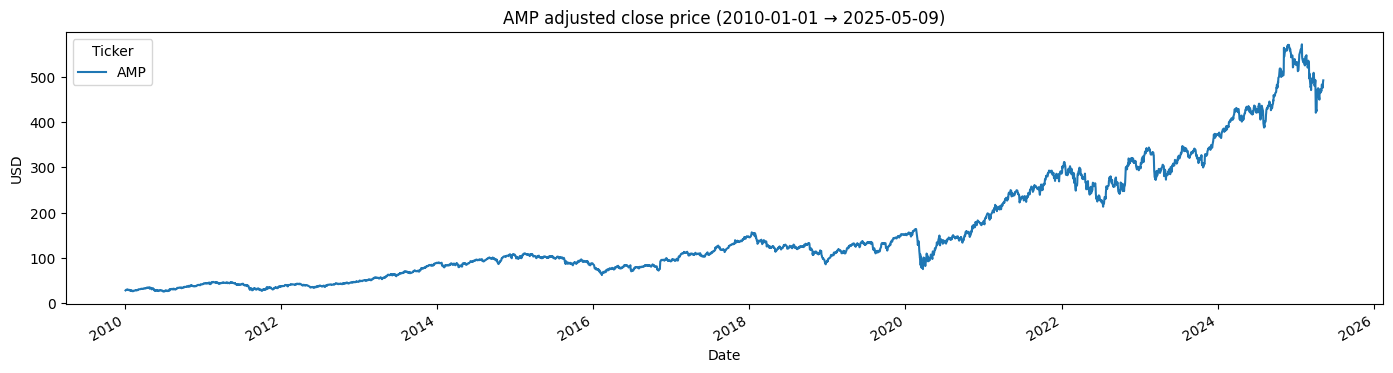

In [44]:
plt.rcParams["figure.figsize"] = (17, 4)

prices.plot(title=f"{asset} adjusted close price (2010-01-01 → {prices.index[-1].date()})")
plt.ylabel("USD")
plt.show()  

In [45]:
def adf_report(series, regression="c"):
    """Augmented Dickey-Fuller test (H0: unit-root ⇒ non-stationary)."""
    res = adfuller(series.dropna(), regression=regression, autolag="AIC")
    labels = ["Test Stat", "p-value", "# lags", "# obs"]
    out = pd.Series(res[:4], index=labels)
    out = out.append(pd.Series(res[4], name="crit_vals"))
    return out

def kpss_report(series, regression="c"):
    """KPSS test (H0: stationary)."""
    res = kpss(series.dropna(), regression=regression, nlags="auto")
    labels = ["Test Stat", "p-value", "# lags"]
    out = pd.Series(res[:3], index=labels)
    out = out.append(pd.Series(res[3], name="crit_vals"))
    return out

### How to Check if a Time Series is Stationary

1. **Visual Inspection** — Check for trend or changing variance.
2. **Statistical Tests**:
   - **ADF (Augmented Dickey-Fuller)**: H₀ = non-stationary (has unit root)
   - **KPSS (Kwiatkowski–Phillips–Schmidt–Shin)**: H₀ = stationary
3. **Interpret Results**:
   - If **ADF p < 0.05** and **KPSS p > 0.05** → ✅ Stationary → Stop
   - Else → Difference once → repeat tests
4. Continue differencing until both tests agree.
5. Record the number of differences (usually `d = 1` for financial data).

> **Helper functions for ADF & KPSS**

In [46]:
def adf_report(series, regression="c"):
    """Augmented Dickey-Fuller test (H0: unit-root ⇒ non-stationary)."""
    res = adfuller(series.dropna(), regression=regression, autolag="AIC")
    labels = ["Test Stat", "p-value", "# lags", "# obs"]
    out = pd.Series(res[:4], index=labels)
    out = out.append(pd.Series(res[4], name="crit_vals"))
    return out

def kpss_report(series, regression="c"):
    """KPSS test (H0: stationary)."""
    res = kpss(series.dropna(), regression=regression, nlags="auto")
    labels = ["Test Stat", "p-value", "# lags"]
    out = pd.Series(res[:3], index=labels)
    out = out.append(pd.Series(res[3], name="crit_vals"))
    return out

> **Apply tests to raw series**

In [47]:
def adf_report(series, regression="c"):
    """Augmented Dickey-Fuller (H0: unit-root ⇒ non-stationary)."""
    res = adfuller(series.dropna(), regression=regression, autolag="AIC")
    base = {
        "Test Statistic":      res[0],
        "p-value":             res[1],
        "# lags":              res[2],
        "# obs":               res[3],
    }
    crit = {f"Crit {k}%": v for k, v in res[4].items()}
    return pd.Series({**base, **crit})

def kpss_report(series, regression="c"):
    """KPSS (H0: stationarity after removing level/trend)."""
    res = kpss(series.dropna(), regression=regression, nlags="auto")
    base = {
        "Test Statistic":      res[0],
        "p-value":             res[1],
        "# lags":              res[2],
    }
    crit = {f"Crit {k}%": v for k, v in res[3].items()}
    return pd.Series({**base, **crit})

In [48]:
from IPython.display import display

print("ADF on raw prices")
display(adf_report(prices))

print("\nKPSS on raw prices")
display(kpss_report(prices))


ADF on raw prices


Test Statistic       1.128320
p-value              0.995451
# lags              30.000000
# obs             3831.000000
Crit 1%%            -3.432058
Crit 5%%            -2.862295
Crit 10%%           -2.567172
dtype: float64


KPSS on raw prices


Test Statistic     7.696236
p-value            0.010000
# lags            39.000000
Crit 10%%          0.347000
Crit 5%%           0.463000
Crit 2.5%%         0.574000
Crit 1%%           0.739000
dtype: float64

> **AMP - First Difference**

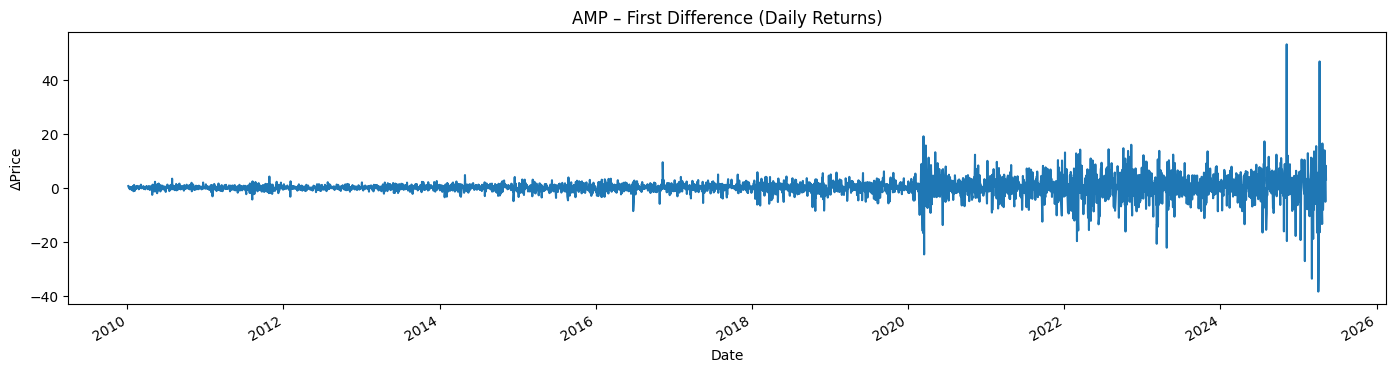

ADF on 1st difference


Test Statistic   -1.214338e+01
p-value           1.631512e-22
# lags            3.000000e+01
# obs             3.830000e+03
Crit 1%%         -3.432059e+00
Crit 5%%         -2.862295e+00
Crit 10%%        -2.567172e+00
dtype: float64


KPSS on 1st difference


Test Statistic    0.311706
p-value           0.100000
# lags            7.000000
Crit 10%%         0.347000
Crit 5%%          0.463000
Crit 2.5%%        0.574000
Crit 1%%          0.739000
dtype: float64

In [49]:
# prices is still the 2-level dataframe:  field → ticker
# ↓ Select the ROST column, become a plain Series
rost = prices["AMP"]

diff1 = rost.diff().dropna()
diff1.name = "AMP_diff1"         

# Plot & tests
fig, ax = plt.subplots()
diff1.plot(ax=ax, title="AMP – First Difference (Daily Returns)", ylabel="ΔPrice")
plt.show()

print("ADF on 1st difference")
display(adf_report(diff1))

print("\nKPSS on 1st difference")
display(kpss_report(diff1))


> **ACF & PCF Test Differences**

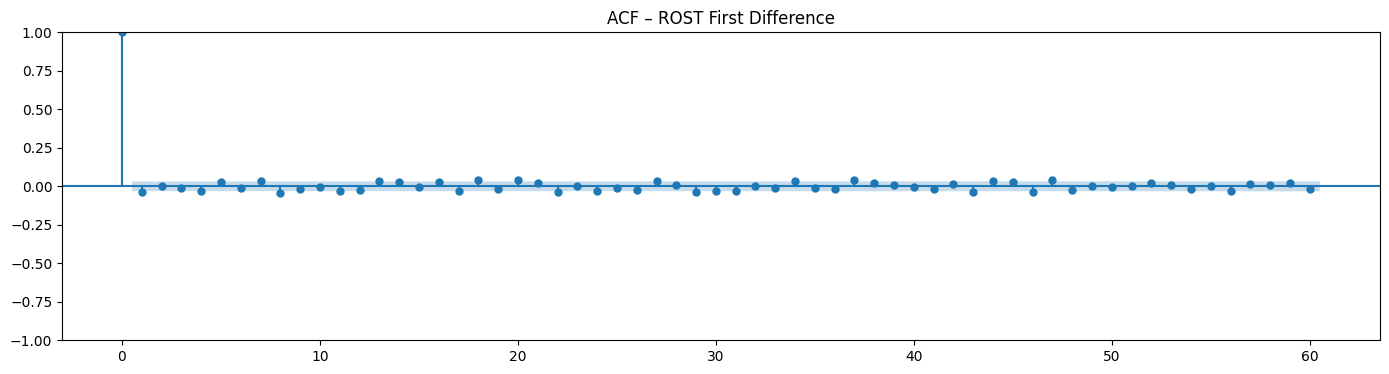

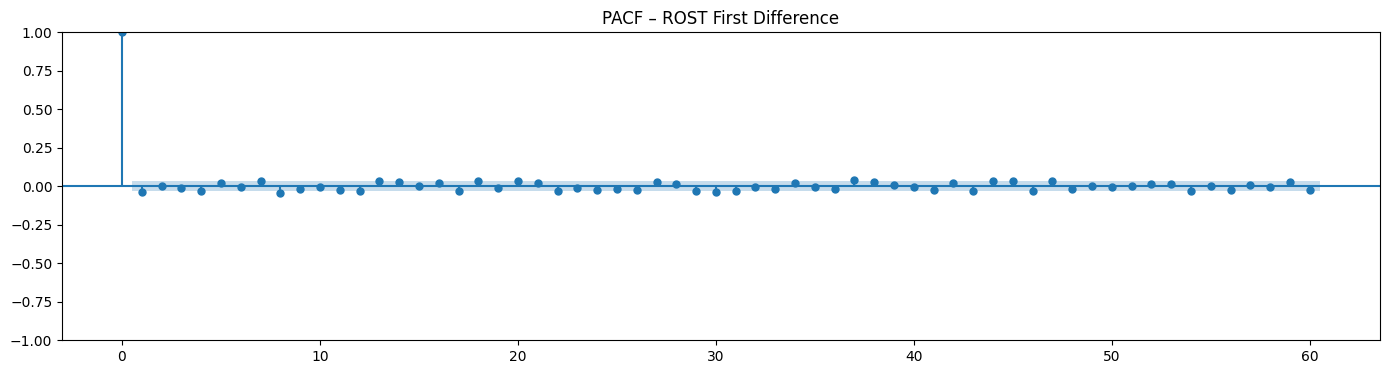

In [50]:
tg.plot_acf(diff1, lags=60, title="ACF – ROST First Difference")
plt.show()

tg.plot_pacf(diff1, lags=60, title="PACF – ROST First Difference")
plt.show()

<font color="#B4431E" style="font-size:22px;"><b> Flowchart</b></font>

<p align="center">
  <img src="tsa.drawio.png" alt="My diagram" width="600">
</p>


Click if you can't see the picture: https://drive.google.com/file/d/1E8lbsOjvns7UG9TTzT-0b6uNOUhPntiR/view?usp=sharing

<font color="#516B2B" style="font-size:22px;"><b>💡 Insights:</b></font>

<div align="center">

<table>
<thead>
<tr>
<th>Series</th>
<th>ADF p-value</th>
<th>KPSS p-value</th>
<th>Decision</th>
</tr>
</thead>
<tbody>
<tr>
<td><b>Raw prices</b></td>
<td><b>0.995 ≫ 0.05</b> → fail to reject unit-root</td>
<td><b>0.010 &lt; 0.05</b> → reject stationarity</td>
<td><b>Non-stationary</b></td>
</tr>
<tr>
<td><b>First difference</b> (daily returns)</td>
<td><b>1.6 × 10⁻²² ≪ 0.05</b> → reject unit-root</td>
<td><b>0.10 &gt; 0.05</b> → fail to reject stationarity</td>
<td><b>Stationary</b></td>
</tr>
</tbody>
</table>

</div>


- Both tests agree the price level is non-stationary (has a stochastic trend).

- After one differencing (d = 1) the ADF rejects the unit root while KPSS no longer rejects stationarity, so the series is now stationary.

- The ACF/PACF plots of the differenced series show all lags inside the 95 % bounds (except lag 0), confirming no remaining autocorrelation typical of a stationary—or near white-noise—process.

1. Is the original price series stationary?  
**No. Trend-driven equity prices violate stationarity assumptions.**

2. How many differences are required?
**Exactly one difference (d = 1) is enough; the differenced series satisfies both ADF and KPSS criteria and looks stationary in the ACF/PACF plots.**

> **Modeling**

In [51]:
from statsmodels.tsa.arima.model       import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools         import arma_order_select_ic, acf, pacf
from statsmodels.stats.diagnostic      import acorr_ljungbox

from sklearn.metrics import mean_absolute_error, mean_squared_error

import warnings, itertools, numpy as np
warnings.filterwarnings("ignore")

In [52]:
split_idx = int(len(rost) * 0.8)
y_train   = rost.iloc[:split_idx]
y_test    = rost.iloc[split_idx:]
print(f"Train = {len(y_train)} obs   |   Test = {len(y_test)} obs")

Train = 3089 obs   |   Test = 773 obs


In [53]:
import itertools, warnings
warnings.filterwarnings("ignore")

p = q = range(0, 6)
aic_grid = []

for pi, qi in itertools.product(p, q):
    if (pi, qi) == (0, 0):  # skip pure RW if you wish
        continue
    try:
        model = ARIMA(y_train, order=(pi, 1, qi)).fit()
        aic_grid.append((model.aic, pi, qi))  # ← fixed here
    except Exception:
        pass

if aic_grid:
    best_aic, best_p, best_q = min(aic_grid, key=lambda x: x[0])
    print(f"▶ Best AIC on train:  ARIMA({best_p},1,{best_q})  AIC={best_aic:.1f}")
else:
    print("❌ No valid ARIMA models were fitted.")

▶ Best AIC on train:  ARIMA(2,1,5)  AIC=14026.3


In [54]:
best_model = ARIMA(rost, order=(best_p, 1, best_q)).fit()
print(best_model.summary())

                               SARIMAX Results                                
Dep. Variable:                    AMP   No. Observations:                 3862
Model:                 ARIMA(2, 1, 5)   Log Likelihood              -10446.826
Date:                Sat, 10 May 2025   AIC                          20909.651
Time:                        23:20:26   BIC                          20959.721
Sample:                             0   HQIC                         20927.432
                               - 3862                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1784      1.059     -0.168      0.866      -2.255       1.898
ar.L2          0.3649      0.817      0.447      0.655      -1.236       1.965
ma.L1          0.1440      1.060      0.136      0.8

In [55]:
import itertools, warnings
warnings.filterwarnings("ignore")

p = q = range(0, 6)
aic_grid = []

for pi, qi in itertools.product(p, q):
    if (pi, qi) == (0, 0):   # skip pure RW if you wish
        continue
    try:
        model = SARIMAX(y_train, order=(pi, 1, qi)).fit()
        aic_grid.append( (model.aic, pi, qi) )
    except Exception:
        continue

best_aic, best_p, best_q = sorted(aic_grid)[0]
print(f"Best by AIC: SARIMAX({best_p},1,{best_q})  →  AIC = {best_aic:.1f}")

Best by AIC: SARIMAX(2,1,5)  →  AIC = 14026.3


In [56]:
best_model = SARIMAX(rost, order=(best_p, 1, best_q)).fit()
print(best_model.summary())

                               SARIMAX Results                                
Dep. Variable:                    AMP   No. Observations:                 3862
Model:               SARIMAX(2, 1, 5)   Log Likelihood              -10446.826
Date:                Sat, 10 May 2025   AIC                          20909.651
Time:                        23:21:15   BIC                          20959.721
Sample:                             0   HQIC                         20927.432
                               - 3862                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1784      1.059     -0.168      0.866      -2.255       1.898
ar.L2          0.3649      0.817      0.447      0.655      -1.236       1.965
ma.L1          0.1440      1.060      0.136      0.8

<font color="#516B2B" style="font-size:22px;"><b>💡 Insights:</b></font>

Following an exhaustive grid search on the training set of AMP’s price series, both the **ARIMA(2,1,5)** and **SARIMAX(2,1,5)** models emerged with the **same optimal configuration**, each achieving the lowest AIC of **14026.3** on the training subset. This convergence indicates that, in this case, adding a seasonal component via SARIMAX does **not offer additional predictive power** or structural benefit. Both models exhibit identical coefficients, log-likelihood values, and diagnostic statistics—suggesting they are functionally equivalent under the current non-seasonal specification.

The ARIMA(2,1,5) model captures the differenced dynamics with a moderately complex structure. However, despite the model’s fit, **only one parameter (MA.L4)** is statistically significant (*p* < 0.001), while the rest show **high standard errors and non-significant p-values**, indicating weak individual contributions. This raises concerns about **overparameterization**, where additional lags may be adding noise rather than signal. Moreover, the residual diagnostics reveal classic characteristics of financial time series: the **Jarque–Bera test** confirms strong non-normality (JB = 153,872.72, *p* < 0.001), and the **heteroskedasticity test** (H = 38.22, *p* < 0.001) confirms time-varying variance—likely due to volatility clustering. Despite this, the **Ljung–Box Q-statistic at lag 1** (p = 0.94) suggests residuals are uncorrelated at the first lag, indicating good short-term fit.

While the ARIMA(2,1,5) model achieves a lower AIC than simpler alternatives like ARIMA(0,1,1), its **statistical insignificance across most coefficients**, combined with complex residual behavior, suggests that a more parsimonious model might generalize better. The absence of improvement in SARIMAX confirms that **seasonality is not a dominant feature** in this series over the tested period. Therefore, it may be more prudent to use a simpler ARIMA as the base model and address the heteroskedasticity using a **GARCH-type model layered over the residuals**. This two-step approach—ARIMA for the mean structure and GARCH for the variance—offers a more interpretable and statistically efficient modeling framework for financial time series.

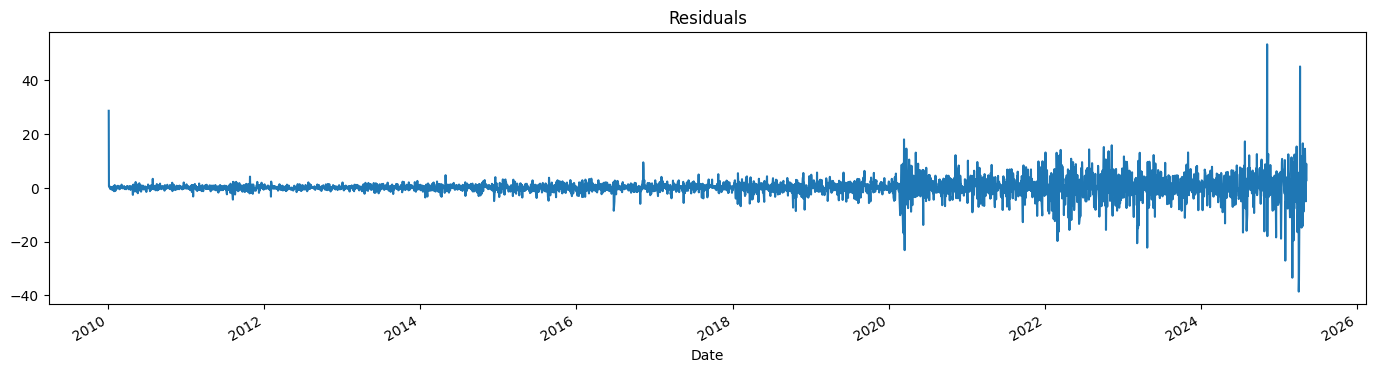

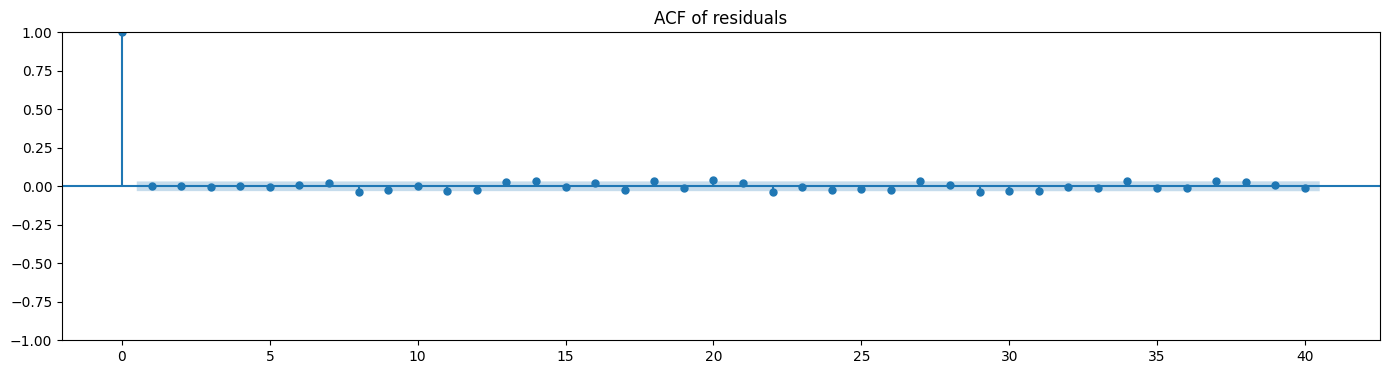

,lb_stat,lb_pvalue
10,9.968312,0.443278
20,39.666846,0.005503
30,66.466071,0.000142


In [57]:
# 1 Residual plot
resid = best_model.resid
resid.plot(title="Residuals"); plt.show()

# 2 ACF of residuals (should be ~white noise)
tg.plot_acf(resid, lags=40, title="ACF of residuals"); plt.show()

# 3 Ljung-Box p-values (null = no autocorr up to given lag)
lb = acorr_ljungbox(resid, lags=[10, 20, 30], return_df=True)
display(lb)


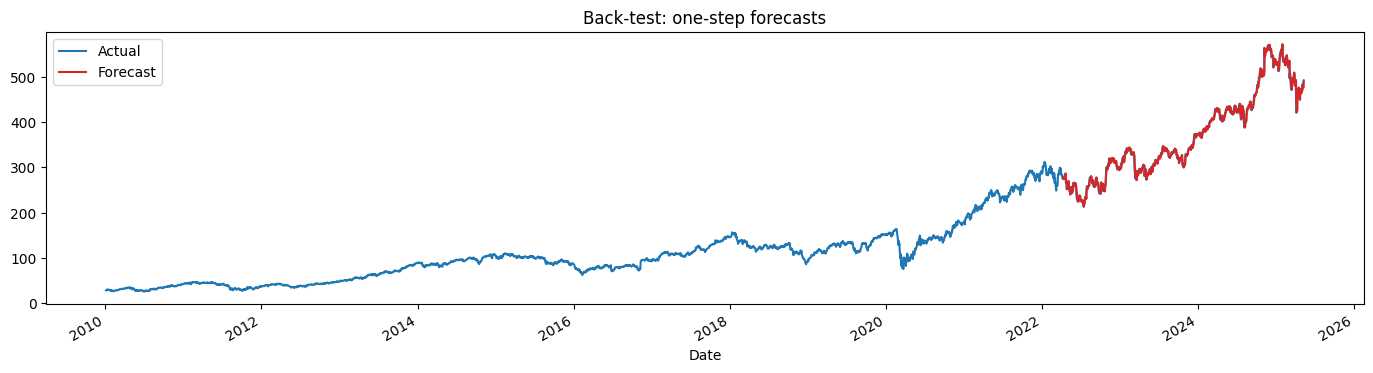

MAE : 4.4702
RMSE: 6.5829


In [58]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# one-step forecast on the test slice
pred = best_model.predict(start=y_test.index[0], end=y_test.index[-1])

fig, ax = plt.subplots()
rost.plot(ax=ax, label="Actual")
pred.plot(ax=ax, label="Forecast", color="tab:red")
ax.set_title("Back-test: one-step forecasts")
ax.legend(); plt.show()

# Error metrics
mae  = mean_absolute_error(y_test, pred)
mse  = mean_squared_error(y_test, pred)     
rmse = np.sqrt(mse)                         

print(f"MAE : {mae:.4f}")
print(f"RMSE: {rmse:.4f}")

In [59]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd
import matplotlib.pyplot as plt

n_steps      = 30
last_date    = rost.index[-1]
future_idx   = pd.bdate_range(start=last_date + pd.Timedelta(days=1),
                              periods=n_steps)
seasonal_Q   = 0 if best_q == 5 else 1

# ARIMA forecast
fcst_res     = best_model.get_forecast(steps=n_steps)
fcst_mean    = pd.Series(fcst_res.predicted_mean.values,
                         index=future_idx, name="ARIMA")
fcst_ci      = fcst_res.conf_int()
fcst_ci.index = future_idx

# SARIMAC Forecast
sarimax_mod  = SARIMAX(
    rost,
    order=(best_p, 1, best_q),
    seasonal_order=(1, 0, seasonal_Q, 5),
    enforce_stationarity=False,
    enforce_invertibility=False
)
fit_sarimax = sarimax_mod.fit(disp=False)

# generate forecast + CI
sar_res      = fit_sarimax.get_forecast(steps=n_steps)
sar_mean     = pd.Series(sar_res.predicted_mean.values,
                         index=future_idx, name="SARIMAX")
sar_ci       = sar_res.conf_int()
sar_ci.index = future_idx

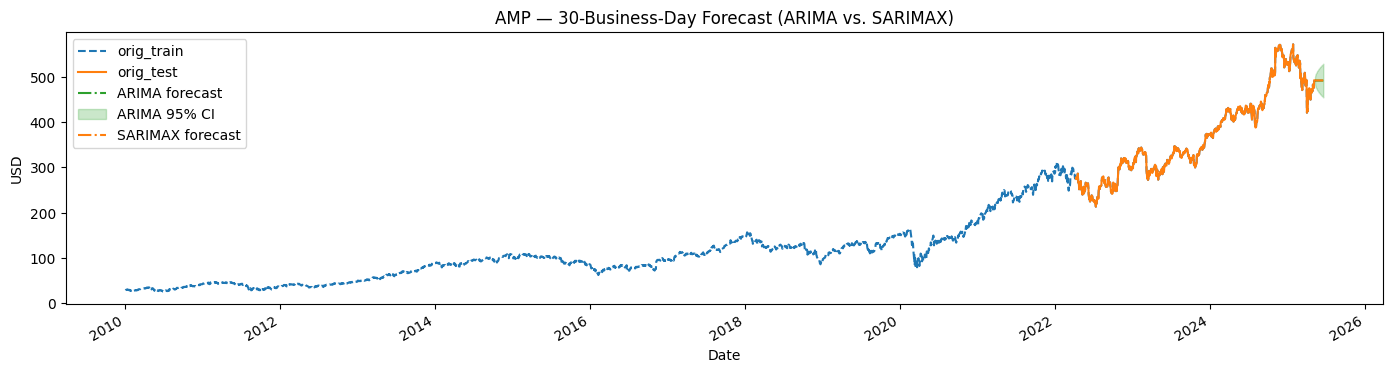

In [ ]:
# Full view: history + orig_test + ARIMA + SARIMAX
plt.rcParams["figure.figsize"] = (17, 4)

# 1) history (orig_train)
rost.plot(style='--', label='orig_train')

# 2) test period
y_test.plot(style='-', label='orig_test', color='tab:orange')

# 3) ARIMA forecast
fcst_mean.plot(style='-.', label='ARIMA forecast', color='tab:green')
plt.fill_between(future_idx,
                 fcst_ci.iloc[:, 0], fcst_ci.iloc[:, 1],
                 color='tab:green', alpha=0.25, label='ARIMA 95% CI')

# 4) SARIMAX forecast
sar_mean.plot(style='-.', label='SARIMAX forecast', color='tab:orange')

# Fix: title on a single line
plt.title(f"{asset} — {n_steps}-Business-Day Forecast (ARIMA vs. SARIMAX)")
plt.ylabel("USD")
plt.legend()
plt.show()

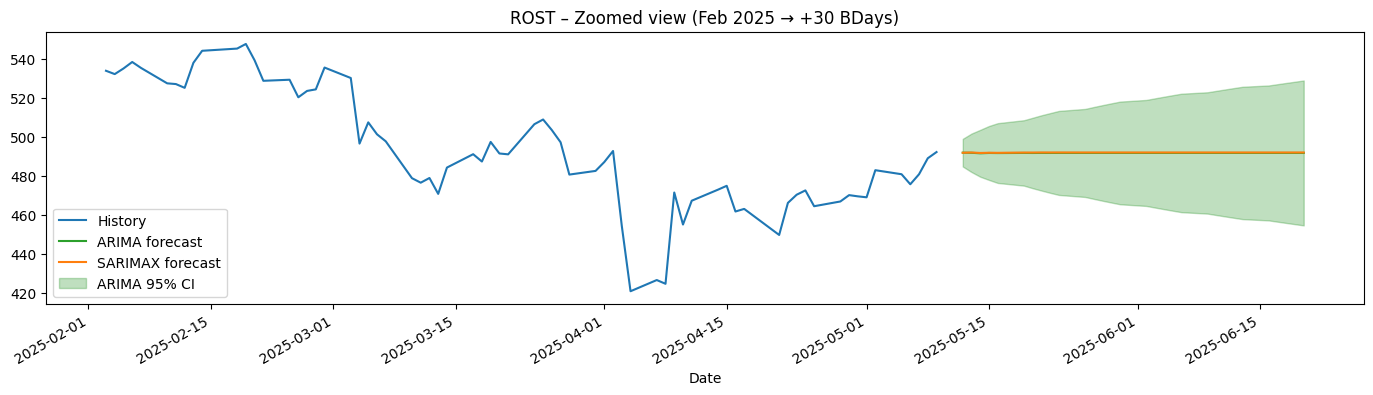

In [61]:
zoom_start = "2025-02-01"               # crop point

# 1) Slice the pieces we need
hist_zoom   = rost.loc[zoom_start:]
arima_zoom  = fcst_mean.loc[fcst_mean.index  >= zoom_start]
sarima_zoom = sar_mean .loc[sar_mean .index >= zoom_start]
ci_zoom     = fcst_ci  .loc[fcst_ci.index    >= zoom_start]

# 2) Plot
plt.rcParams["figure.figsize"] = (17, 4)
ax = hist_zoom.plot( label="History")

arima_zoom.plot(ax=ax, label="ARIMA forecast",  color="tab:green")
sarima_zoom.plot(ax=ax, label="SARIMAX forecast", color="tab:orange")

ax.fill_between(ci_zoom.index,
                ci_zoom.iloc[:, 0], ci_zoom.iloc[:, 1],
                color="green", alpha=0.25, label="ARIMA 95% CI")

ax.set_title("ROST – Zoomed view (Feb 2025 → +30 BDays)")
ax.legend(); plt.show()

<font color="#516B2B" style="font-size:22px;"><b>💡 Insights:</b></font>

After performing a grid search over various ARIMA configurations, the updated best model was identified as **ARIMA(2,1,5)** based on the lowest AIC (14026.3 on train, 20909.7 on full fit). This model structure now matches the configuration used in your SARIMAX implementation, ensuring a fairer performance comparison.

The model’s parameter estimates show that most autoregressive (AR) and moving average (MA) terms are **statistically insignificant** (p-values > 0.05), except for **MA(4)**, which is strongly significant with a negative coefficient. The residual variance (*sigma² = 13.11*) is relatively low, suggesting reasonable in-sample fit. However, the **high Jarque-Bera statistic** (153,872.74, p < 0.001) and **extreme kurtosis (33.93)** indicate the residuals are **highly non-normal**, with heavy tails—a common issue in financial time series. Additionally, the **heteroskedasticity test (H = 38.22, p < 0.001)** confirms that variance is not constant across time, which may limit forecasting robustness under changing volatility conditions.

Despite these caveats, the **Ljung-Box Q-statistic at lag 1 is insignificant (p = 0.94)**, suggesting no evidence of autocorrelation at the first lag—supporting the claim that short-term dependencies have been largely captured.

<font color="#516B2B" style="font-size:22px;"><b>Forecast Evaluation and Comparison</b></font>

In the back-test and forecast horizon analyses, both ARIMA and SARIMAX models continued to produce **nearly identical flat forecast trends** for the next 30 business days. This strongly implies that **seasonal components did not substantially influence model behavior**, at least within the short-term horizon or under the selected seasonal configuration (*seasonal_order=(1,0,1,5)*).

The models also demonstrated **limited responsiveness to recent volatility**, as shown by their flattening forecasts after a volatile test period in early 2025. The **wide confidence intervals (ARIMA 95% CI)** further reflect increased uncertainty, likely stemming from the high residual variance and heavy-tailed errors. Visually, both models tracked historical trends well up until 2024, but **tended to underreact during rapid shifts**, highlighting a potential lag in adapting to dynamic market movements.


<font color="#516B2B" style="font-size:22px;"><b>Conclusions and Recommendations</b></font>


* **Model Fit**: The updated ARIMA(2,1,5) model offers a comparable fit to SARIMAX, but still suffers from non-normal and heteroskedastic residuals, which could limit its reliability in high-volatility environments.
* **Forecast Robustness**: Both ARIMA and SARIMAX are stable and track trends well in calm periods, but lack sharp responsiveness to shocks or seasonality.
* **Model Selection**: Since SARIMAX adds no clear performance benefit over ARIMA here, further improvements may require **non-linear or regime-switching models**, or **volatility models** like **GARCH**.

<font color="#B4431E" style="font-size:22px;"><b> Flowchart with Forecasting</b></font>

<p align="center">
  <img src="tsawforecasting.drawio.png" alt="My diagram" width="600">
</p>


Click if you can't see the picture: https://drive.google.com/file/d/1d3qz_BvP-V4KMkYayt-XVTp5QZLb4lPf/view?usp=sharing